# A Quick Introduction to FinOL

This Jupyter notebook goes through the basic usage of ``FinOL``.

- Install ``FinOL``
- Complete the whole data-training-testing process involves
  - Read train/valid/test data
  - Define and optimize model
  - Evaluate model

## Install FinOL and additional dependencies

``FinOL`` can be installed via `pip` or from the master branch of Git repository.
Most of the dependencies required by ``FinOL`` are automatically installed when using
 the provided pyproject.toml file. HHowever, specific dependencies like ``TA-Lib``
 require separate installation as it is a library with C/C++ bindings.

In the code snippet below, you can see the method to install ``TA-Lib`` in a Colab environment.
For users running ``FinOL`` on Windows, Linux, or Mac, please refer to our official documentation for
detailed installation instructions. The documentation outlines how to install ``FinOL`` completely, including ``TA-Lib``.

In [1]:
# install finol and most dependencies
!pip install --upgrade finol
!pip show finol

In [ ]:
# install ta-lib
import os

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!sudo make install
os.chdir('../')
!pip install TA-Lib

In [1]:
import finol

finol.__version__

'0.2.5'

## Command Line Usage

Before running the above commands, users can first configure some parameters through the config file to customize the usage according to their needs. For example, setting the device, selecting a dataset, adjusting the data pre-processing parameters, and choosing a model, etc. The specific configuration method is as follows:

In [2]:
from finol.utils import load_config, update_config

config = load_config()
config["DEVICE"] = "auto"
config["DATASET_NAME"] = "DJIA"
config["DATA_AUGMENTATION_CONFIG"]["WINDOW_DATA"]["WINDOW_SIZE"] = 15
config["SCALER"] = "WindowMinMaxScaler"
config["MODEL_NAME"] = "DNN"
config["TUNE_PARAMETERS"] = True  # False
update_config(config)
config

ROOT_PATH: D:\360安全云盘同步版\01-广工\07-研一\00-论文\00-本人论文\13-FinOL\FinOL\finol
PARENT_PATH: D:\360安全云盘同步版\01-广工\07-研一\00-论文\00-本人论文\13-FinOL\FinOL


{'_note1': '--------------------------------------- General Configuration ------------------------------------------',
 'DEVICE': 'auto',
 'MANUAL_SEED': 0,
 '_note2': '-------------------------------------- Data Layer Configuration ----------------------------------------',
 'LOAD_LOCAL_DATALOADER': True,
 'DATASET_NAME': 'DJIA',
 'DATASET_SPLIT_CONFIG': {'NYSE(O)': {'TRAIN_START_TIMESTAMP': '1962-07-03',
   'TRAIN_END_TIMESTAMP': '1976-01-21',
   'VAL_START_TIMESTAMP': '1976-01-22',
   'VAL_END_TIMESTAMP': '1980-07-11',
   'TEST_START_TIMESTAMP': '1980-07-14',
   'TEST_END_TIMESTAMP': '1984-12-31'},
  'NYSE(N)': {'TRAIN_START_TIMESTAMP': '1985-01-02',
   'TRAIN_END_TIMESTAMP': '2000-04-06',
   'VAL_START_TIMESTAMP': '2000-04-07',
   'VAL_END_TIMESTAMP': '2005-05-20',
   'TEST_START_TIMESTAMP': '2005-05-23',
   'TEST_END_TIMESTAMP': '2010-06-30'},
  'DJIA': {'TRAIN_START_TIMESTAMP': '2001-01-14',
   'TRAIN_END_TIMESTAMP': '2002-04-01',
   'VAL_START_TIMESTAMP': '2002-04-02',
   'VAL_E

The current FinOL (version: 0.2.5) is not latest, The latest version on https://pypi.org/project/finol is 0.2.4, please consider updating by ``pip install --upgrade finol``
Data downloading......
Local dataloader loaded successfully!


[I 2024-09-03 22:35:39,293] A new study created in RDB with name: no-name-c56bdc7b-abbf-43ca-a37e-f01a4e2aeb19
Training: 100%|██████████| 100/100 [00:04<00:00, 23.94it/s]
[I 2024-09-03 22:35:44,618] Trial 0 finished with value: -0.0008799484930932522 and parameters: {'NUM_LAYERS': 3, 'HIDDEN_SIZE': 192, 'DROPOUT': 0.30000000000000004}. Best is trial 0 with value: -0.0008799484930932522.
Training: 100%|██████████| 100/100 [00:03<00:00, 30.61it/s]
[I 2024-09-03 22:35:48,000] Trial 1 finished with value: 0.0011794161473517306 and parameters: {'NUM_LAYERS': 1, 'HIDDEN_SIZE': 32, 'DROPOUT': 0.0}. Best is trial 0 with value: -0.0008799484930932522.
Training: 100%|██████████| 100/100 [00:03<00:00, 26.15it/s]
[I 2024-09-03 22:35:51,911] Trial 2 finished with value: 0.0011794161473517306 and parameters: {'NUM_LAYERS': 3, 'HIDDEN_SIZE': 160, 'DROPOUT': 0.25}. Best is trial 0 with value: -0.0008799484930932522.
Training: 100%|██████████| 100/100 [00:03<00:00, 25.86it/s]
[I 2024-09-03 22:35:55,863

<Figure size 640x480 with 0 Axes>

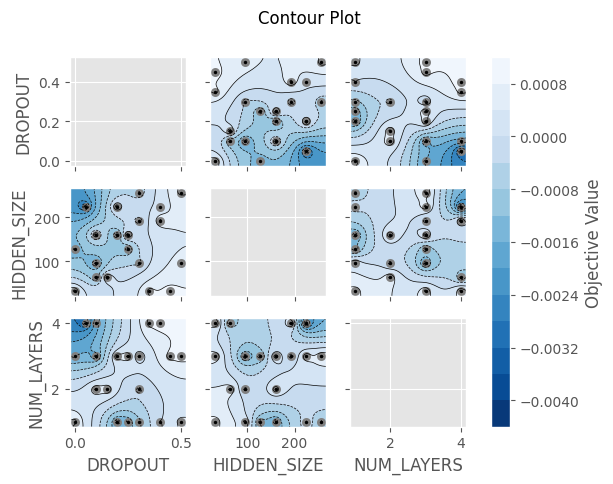

<Figure size 640x480 with 0 Axes>

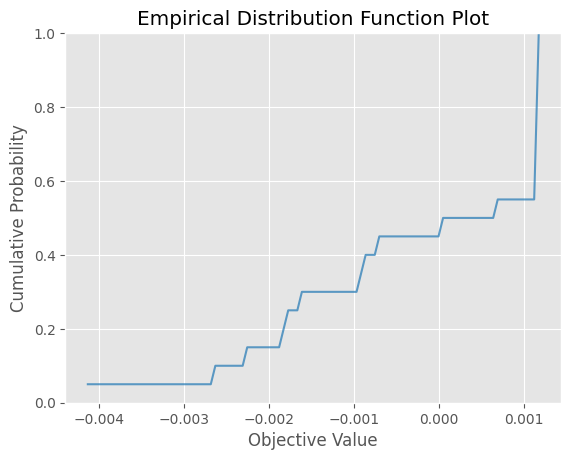

<Figure size 640x480 with 0 Axes>

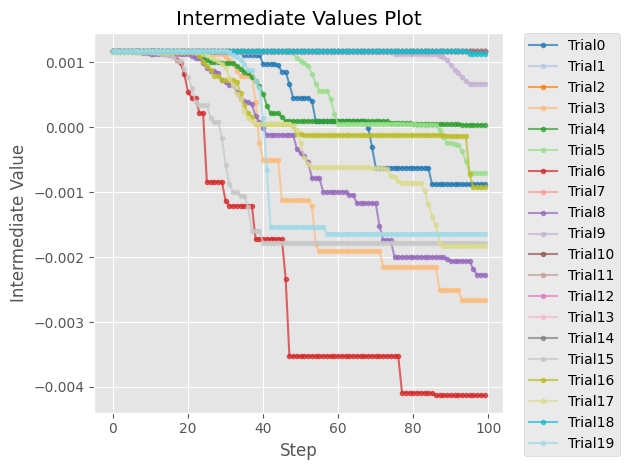

<Figure size 640x480 with 0 Axes>

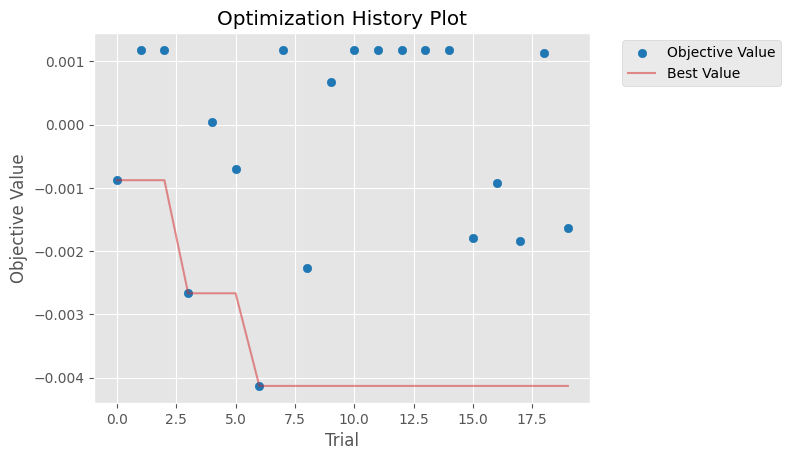

<Figure size 640x480 with 0 Axes>

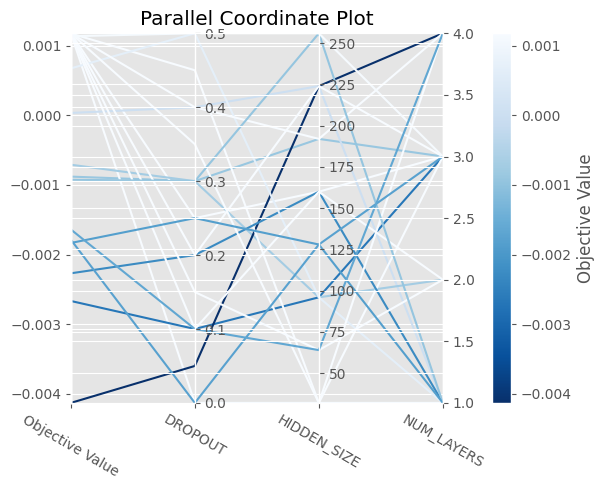

<Figure size 640x480 with 0 Axes>

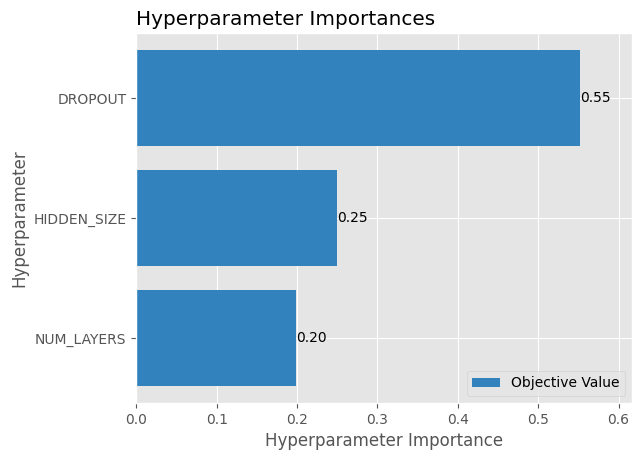

[W 2024-09-03 22:37:01,014] Output figures of this Matplotlib-based `plot_rank` function would be different from those of the Plotly-based `plot_rank`.


<Figure size 640x480 with 0 Axes>

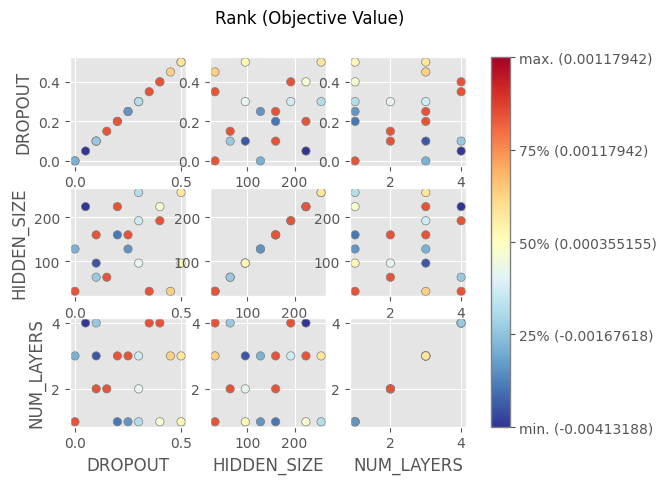

<Figure size 640x480 with 0 Axes>

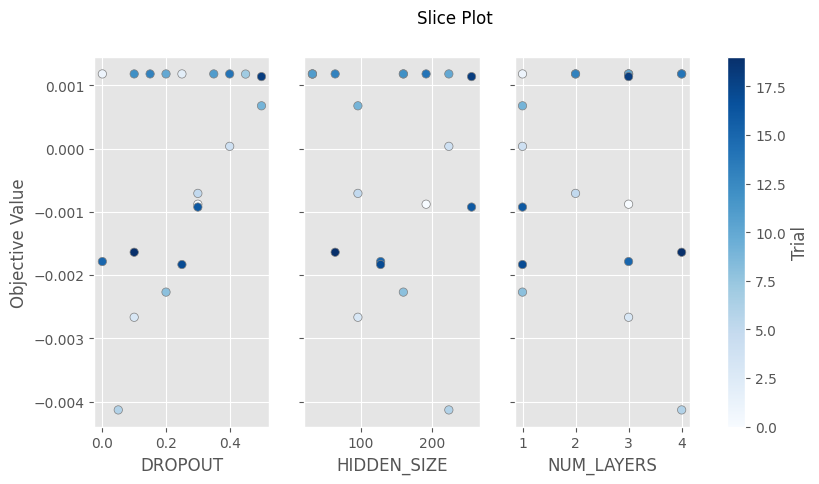

100%|██████████| 20/20 [00:01<00:00, 17.26it/s]


<Figure size 640x480 with 0 Axes>

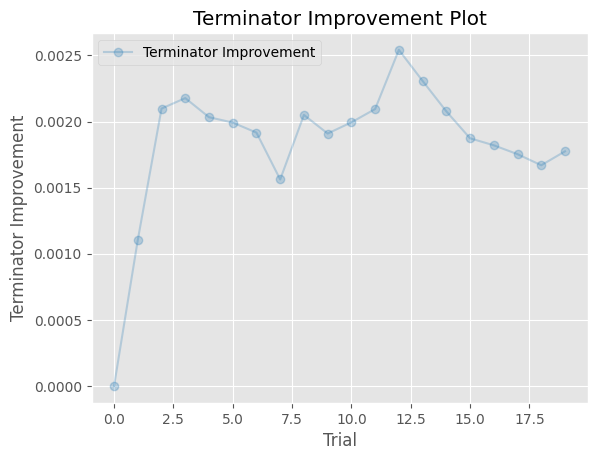

<Figure size 640x480 with 0 Axes>

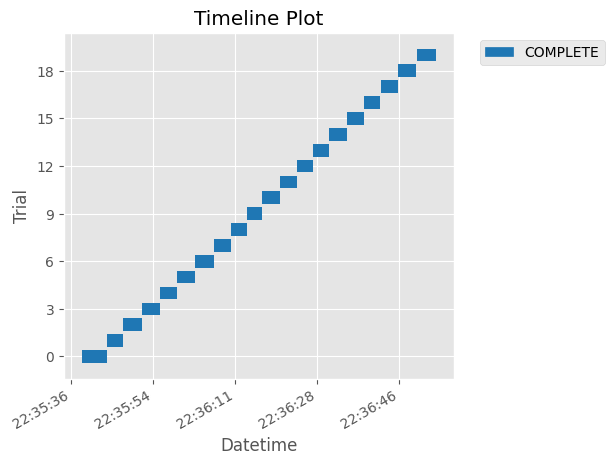

+--------------------------------+--------------------------------------------------------+
| Auto Hyper-parameters Tuning   | INFO                                                   |
|--------------------------------+--------------------------------------------------------|
| Sampler                        | QMCSampler                                             |
| Pruner                         | PatientPruner                                          |
| Number of finished trials      | 20                                                     |
| Best trial parameters          | {'NUM_LAYERS': 4, 'HIDDEN_SIZE': 224, 'DROPOUT': 0.05} |
| Best score                     | -0.004131880705244839                                  |
+--------------------------------+--------------------------------------------------------+


Training: 100%|██████████| 100/100 [00:03<00:00, 25.09it/s]


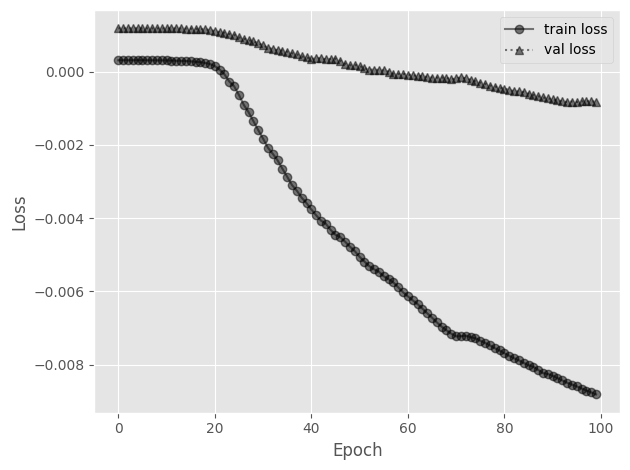

Profitability comparison with the top five baselines:
+-----------------+---------+---------+---------+----------+--------------+---------+
| Profit Metric   | SSPO    | PPT     | KTPT    | PAMR     | CWMR-Stdev   | DNN     |
|-----------------+---------+---------+---------+----------+--------------+---------|
| FCW             | 1.81362 | 1.74038 | 1.69485 | 1.31305  | 1.2892       | 1.7759  |
| APY             | 3.48266 | 3.0404  | 2.77931 | 0.986413 | 0.89675      | 3.25144 |
| SR              | 7.87906 | 6.80708 | 6.43841 | 2.36678  | 2.1657       | 5.62417 |
+-----------------+---------+---------+---------+----------+--------------+---------+
Risk resilience comparison with the top five baselines:
+---------------+----------+----------+----------+----------+--------------+----------+
| Risk Metric   | SSPO     | PPT      | KTPT     | PAMR     | CWMR-Stdev   | DNN      |
|---------------+----------+----------+----------+----------+--------------+----------|
| VR            | 0.4369

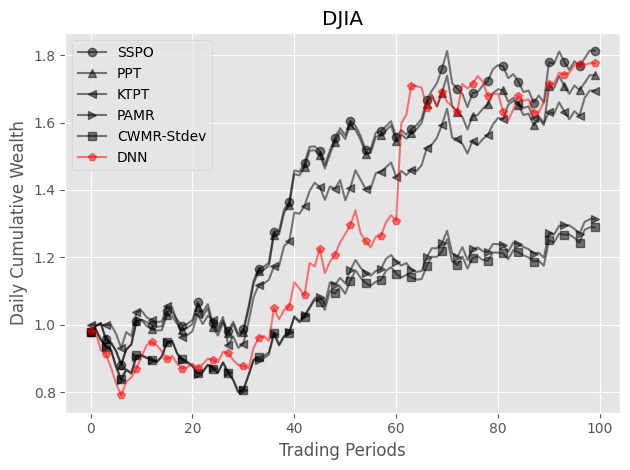

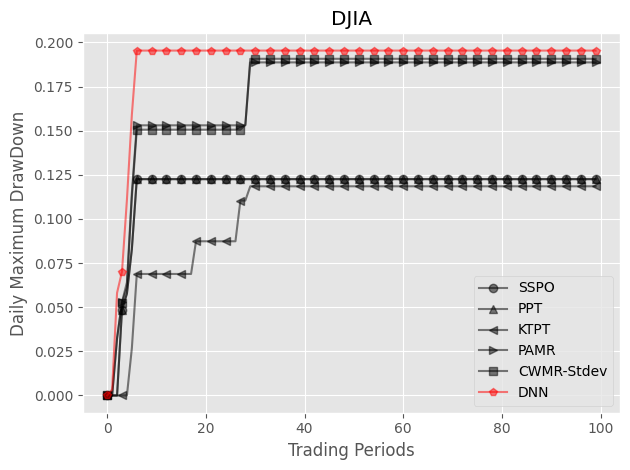

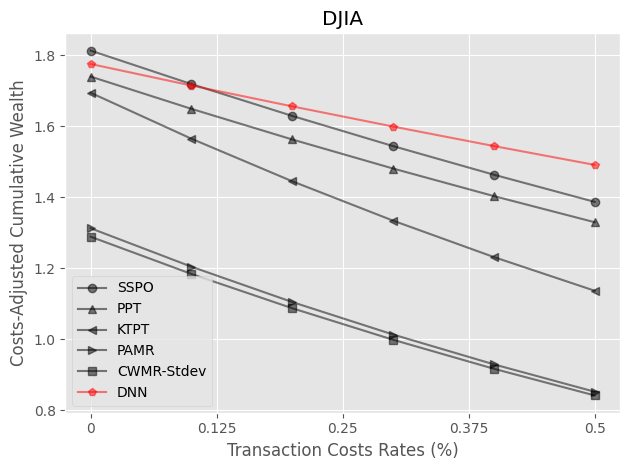

<Figure size 640x480 with 0 Axes>

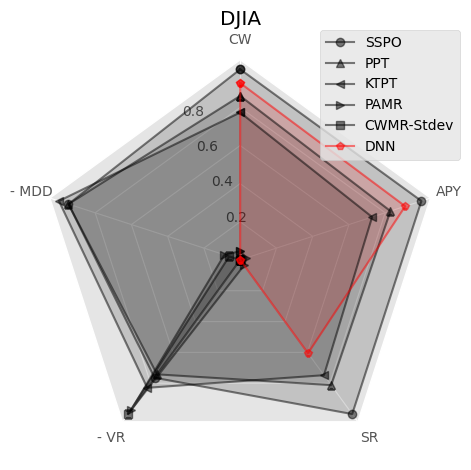

In [3]:
from finol.data_layer.dataset_loader import DatasetLoader
from finol.optimization_layer.model_trainer import ModelTrainer
from finol.evaluation_layer.model_evaluator import ModelEvaluator


load_dataset_output = DatasetLoader().load_dataset()
train_model_output = ModelTrainer(load_dataset_output).train_model()
evaluate_model_output = ModelEvaluator(load_dataset_output, train_model_output).evaluate_model()